In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from datetime import datetime
from matplotlib import dates as mdates
from bs4 import BeautifulSoup as bs

url1 = 'https://finance.naver.com/item/sise_day.nhn?code=005930' # 네이버 금융 -> 삼성전자
headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/130.0.0.0 Safari/537.36'}
response = requests.get(url1,headers= headers)
response.text

'\n<html lang="ko">\n<head>\n<meta http-equiv="Content-Type" content="text/html; charset=euc-kr">\n<title>네이버페이 증권</title>\n\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20241121174830/css/newstock.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20241121174830/css/common.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20241121174830/css/finance_header.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20241121174830/css/layout.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20241121174830/css/main.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20241121174830/css/newstock2.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20241121174830/css/newstock3.css">\n<link rel="st

In [3]:
html = bs(response.text, 'html.parser')  #html 데이터 저장
html_table = html.select("table")  #table 태그 선택
table = pd.read_html(str(html_table))  


C:\Users\김동준\AppData\Local\Temp\ipykernel_18792\3673396135.py:3: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(str(html_table))


In [4]:
table[0].dropna() # 결측값 삭제

,날짜,종가,전일비,시가,고가,저가,거래량
1,2024.11.22,56000.0,하락 400,56000.0,56700.0,55900.0,15127462.0
2,2024.11.21,56400.0,"상승 1,100",54900.0,56900.0,54700.0,19096850.0
3,2024.11.20,55300.0,"하락 1,000",56100.0,56500.0,54800.0,20864667.0
4,2024.11.19,56300.0,하락 400,56500.0,57500.0,55900.0,31539632.0
5,2024.11.18,56700.0,"상승 3,200",57000.0,57500.0,55900.0,48095234.0
9,2024.11.15,53500.0,"상승 3,600",50300.0,54200.0,50300.0,46774485.0
10,2024.11.14,49900.0,하락 700,50200.0,51800.0,49900.0,48510715.0
11,2024.11.13,50600.0,"하락 2,400",52000.0,53000.0,50500.0,52527995.0
12,2024.11.12,53000.0,"하락 2,000",54600.0,54600.0,53000.0,37962881.0
13,2024.11.11,55000.0,"하락 2,000",56700.0,56800.0,55000.0,29811326.0


In [ ]:
df = pd.DataFrame()
sise_url = 'https://finance.naver.com/item/sise_day.nhn?code=005930'  
for page in range(1, 99):
    page_url = '{}&page={}'.format(sise_url, page)
    print(page_url)

    # 위에서 했던 일련의 과정들을 각 url에 대해서 30페이지에 대해서 반복
    response = requests.get(page_url, headers=headers)
    html = bs(response.text, 'html.parser')
    html_table = html.select("table")
    table = pd.read_html(str(html_table))

    # 현재 얻은 데이터프레임을 기존 데이터프레임에 누적
    df = pd.concat([df, table[0].dropna()], ignore_index=True)
    df = df.dropna()
    df = df.iloc[0:100] 
    df = df.sort_values(by='날짜')


In [9]:
df

,날짜,종가,전일비,시가,고가,저가,거래량
0,2024.06.26,81300.0,상승 500,80100.0,81400.0,79900.0,17783242.0
1,2024.06.27,81600.0,상승 300,81300.0,81600.0,80500.0,11739720.0
2,2024.06.28,81500.0,하락 100,81900.0,81900.0,80800.0,9455929.0
3,2024.07.01,81800.0,상승 300,81500.0,82100.0,81300.0,11317202.0
4,2024.07.02,81800.0,보합0,82500.0,82600.0,81500.0,14471904.0
...,...,...,...,...,...,...,...
95,2024.11.15,53500.0,"상승 3,600",50300.0,54200.0,50300.0,46774485.0
96,2024.11.18,56700.0,"상승 3,200",57000.0,57500.0,55900.0,48095234.0
97,2024.11.19,56300.0,하락 400,56500.0,57500.0,55900.0,31539632.0
98,2024.11.20,55300.0,"하락 1,000",56100.0,56500.0,54800.0,20864667.0


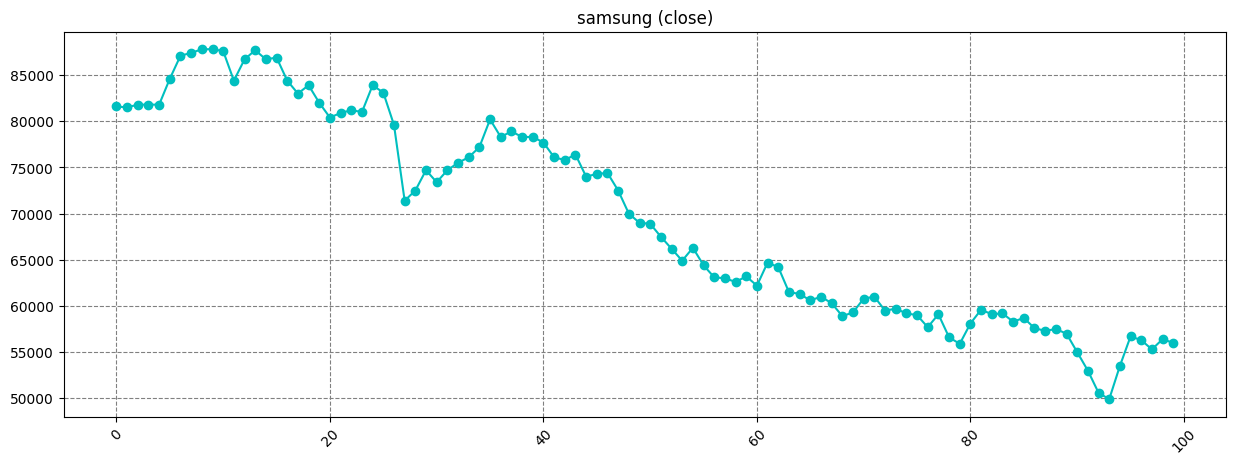

In [6]:
plt.figure(figsize=(15, 5)) 
plt.title('samsung (close)')
plt.xticks(rotation=45) 
plt.plot( df['종가'], 'co-')
plt.grid(color='gray', linestyle='--')
plt.show()

In [ ]:
df2 = pd.DataFrame()
sise_url2 = 'https://finance.naver.com/item/sise_day.nhn?code=000660' # sk하이닉스
for page in range(1, 99):
    page_url2 = '{}&page={}'.format(sise_url2, page)
    response2 = requests.get(page_url2, headers=headers)
    html2 = bs(response2.text, 'html.parser')
    html_table2 = html2.select("table")
    table2 = pd.read_html(str(html_table2))
    
    # 현재 얻은 데이터프레임을 기존 데이터프레임에 누적
    df2 = pd.concat([df2, table2[0].dropna()], ignore_index=True)
    df2 = df2.dropna()
    df2 = df2.iloc[0:100] 
    df2 = df2.sort_values(by='날짜')


In [12]:
df2

,날짜,종가,전일비,시가,고가,저가,거래량
0,2024.06.26,237000.0,"상승 12,000",228000.0,238500.0,227500.0,5166862.0
1,2024.06.27,236500.0,하락 500,229500.0,239000.0,227500.0,3763005.0
2,2024.06.28,236500.0,보합0,235500.0,237500.0,232500.0,2368287.0
3,2024.07.01,235500.0,"하락 1,000",233500.0,236500.0,232000.0,1709955.0
4,2024.07.02,232000.0,"하락 3,500",235500.0,237000.0,230500.0,2343947.0
...,...,...,...,...,...,...,...
95,2024.11.15,178200.0,"상승 5,200",174000.0,179000.0,173600.0,4330750.0
96,2024.11.18,171700.0,"하락 6,500",173800.0,177800.0,170300.0,3885644.0
97,2024.11.19,170600.0,"하락 1,100",170400.0,172900.0,168100.0,4075013.0
98,2024.11.20,170600.0,보합0,175000.0,175100.0,170200.0,3689296.0


In [ ]:
df3 = pd.DataFrame()
sise_url3 = 'https://finance.naver.com/item/sise_day.nhn?code=042700'  #한미반도체
for page in range(1, 99):
    page_url3 = '{}&page={}'.format(sise_url3, page)
    response3 = requests.get(page_url3, headers=headers)
    html3 = bs(response3.text, 'html.parser')
    html_table3 = html3.select("table")
    table3 = pd.read_html(str(html_table3))
    df3 = pd.concat([df3, table3[0].dropna()], ignore_index=True)
    df3 = df3.dropna()
    df3 = df3.iloc[0:100] 
    df3 = df3.sort_values(by='날짜')


df4 = pd.DataFrame()
sise_url4 = 'https://finance.naver.com/item/sise_day.nhn?code=357780'  #솔브레인
for page in range(1, 99):
    page_url4 = '{}&page={}'.format(sise_url4, page)
    response4 = requests.get(page_url4, headers=headers)
    html4 = bs(response4.text, 'html.parser')
    html_table4 = html4.select("table")
    table4 = pd.read_html(str(html_table4))
    df4 = pd.concat([df4, table4[0].dropna()], ignore_index=True)
    df4 = df4.dropna()
    df4 = df4.iloc[0:100] 
    df4 = df4.sort_values(by='날짜')  

df5 = pd.DataFrame()
sise_url5 = 'https://finance.naver.com/item/sise_day.nhn?code=039030'  #이오테크닉스
for page in range(1, 99):
    page_url5 = '{}&page={}'.format(sise_url5, page)
    response5 = requests.get(page_url5, headers=headers)
    html5 = bs(response5.text, 'html.parser')
    html_table5 = html5.select("table")
    table5 = pd.read_html(str(html_table5))
    df5 = pd.concat([df5, table5[0].dropna()], ignore_index=True)
    df5 = df5.dropna()
    df5 = df5.iloc[0:100] 
    df5 = df5.sort_values(by='날짜') 

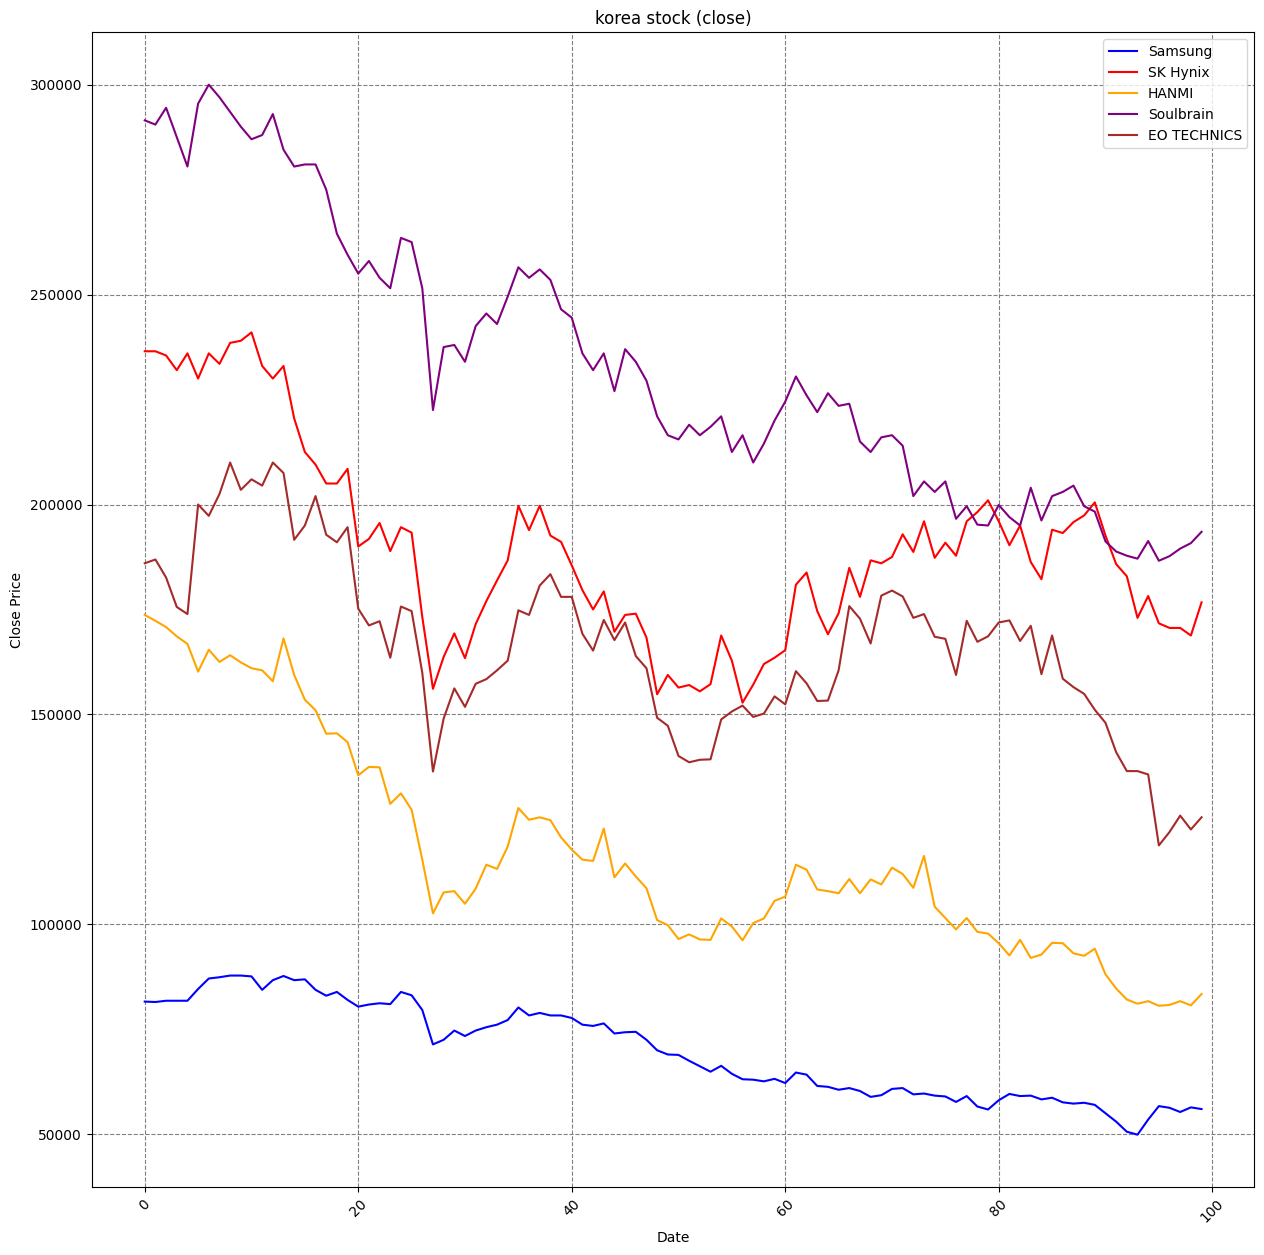

In [17]:
plt.figure(figsize=(15, 15)) 
plt.title('korea stock (close)')
plt.xticks(rotation=45) 
plt.plot( df['종가'], color='blue', label='Samsung')
plt.plot( df2['종가'], color='red', label='SK Hynix')
plt.plot( df3['종가'], color='orange', label='HANMI')
plt.plot( df4['종가'], color='purple', label='Soulbrain')
plt.plot( df5['종가'], color='brown', label='EO TECHNICS')
plt.grid(color='gray', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [42]:
df11 = df.copy()
df11['날짜'] = pd.to_datetime(df11['날짜'])
start_date = '2024.07.01'
end_date = '2024.08.31'
df11 = df11[(df11['날짜'] >= start_date) & (df11['날짜'] <= end_date)]
df11 = df11.dropna()
df11.set_index('날짜', inplace=True)

print(df11.columns)

df22 = df2.copy()
df22['날짜'] = pd.to_datetime(df22['날짜'])
start_date = '2024.07.01'
end_date = '2024.08.31'
df22 = df22[(df22['날짜'] >= start_date) & (df22['날짜'] <= end_date)]
df22 = df22.dropna()
df22.set_index('날짜', inplace=True)


df33 = df3.copy()
df33['날짜'] = pd.to_datetime(df33['날짜'])
start_date = '2024.07.01'
end_date = '2024.08.31'
df33 = df33[(df33['날짜'] >= start_date) & (df33['날짜'] <= end_date)]
df33 = df33.dropna()
df33.set_index('날짜', inplace=True)

df44 = df4.copy()
df44['날짜'] = pd.to_datetime(df44['날짜'])
start_date = '2024.07.01'
end_date = '2024.08.31'
df44 = df44[(df44['날짜'] >= start_date) & (df44['날짜'] <= end_date)]
df44 = df44.dropna()
df44.set_index('날짜', inplace=True)

df55 = df5.copy()
df55['날짜'] = pd.to_datetime(df55['날짜'])
start_date = '2024.07.01'
end_date = '2024.08.31'
df55 = df55[(df55['날짜'] >= start_date) & (df55['날짜'] <= end_date)]
df55 = df55.dropna()
df55.set_index('날짜', inplace=True)
print(df55)



Index(['종가', '전일비', '시가', '고가', '저가', '거래량'], dtype='object')
                  종가         전일비        시가        고가        저가       거래량
날짜                                                                      
2024-07-01  182600.0   하락  4,300  187000.0  187000.0  181300.0   67395.0
2024-07-02  175600.0   하락  7,000  182100.0  183600.0  175100.0  113007.0
2024-07-03  173900.0   하락  1,700  175700.0  176000.0  170900.0  103329.0
2024-07-04  200000.0  상승  26,100  179100.0  202000.0  179000.0  909252.0
2024-07-05  197300.0   하락  2,700  204000.0  211000.0  197000.0  356237.0
2024-07-08  202500.0   상승  5,200  199100.0  209000.0  198700.0  188559.0
2024-07-09  210000.0   상승  7,500  212500.0  220500.0  208500.0  542835.0
2024-07-10  203500.0   하락  6,500  207500.0  212500.0  202000.0  191124.0
2024-07-11  206000.0   상승  2,500  210000.0  216500.0  205500.0  261777.0
2024-07-12  204500.0   하락  1,500  201500.0  210500.0  201500.0  164206.0
2024-07-15  210000.0   상승  5,500  204500.0  211500.0  200000.0

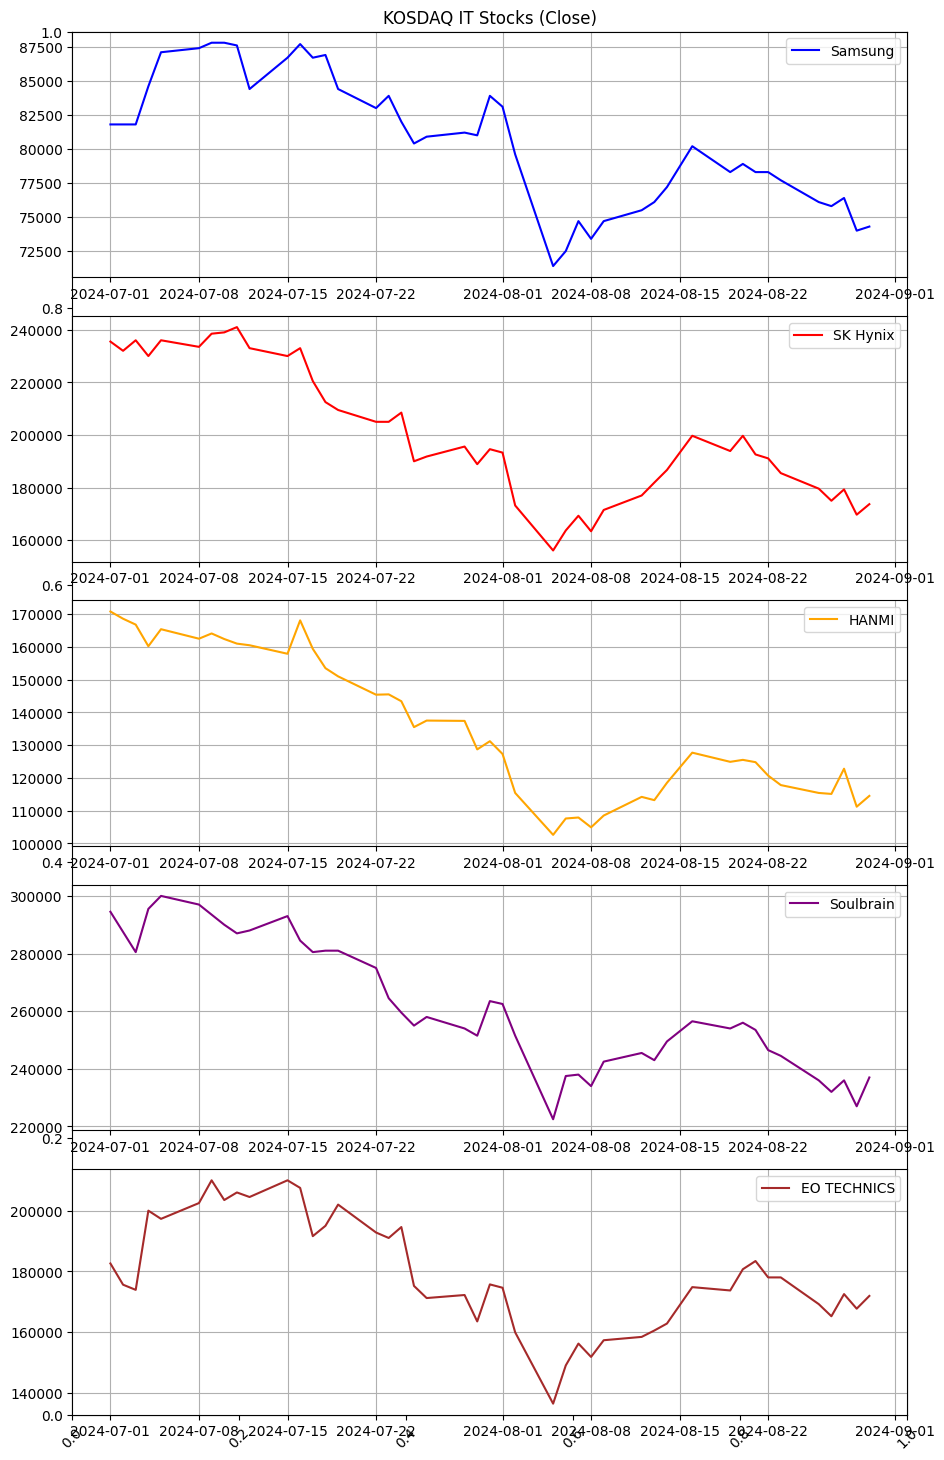

In [43]:
plt.figure(figsize=(10, 15))
plt.xticks(rotation=45) 

plt.subplot(5, 1, 1)
plt.plot( df11['종가'], color='blue', label='Samsung')
plt.title('KOSDAQ IT Stocks (Close)')
plt.grid(True)
plt.legend()

plt.subplot(5, 1, 2)
plt.plot( df22['종가'], color='red', label='SK Hynix')
plt.grid(True)
plt.legend()

plt.subplot(5, 1, 3)
plt.plot( df33['종가'], color='orange', label='HANMI')
plt.grid(True)
plt.legend()

plt.subplot(5, 1, 4)
plt.plot( df44['종가'], color='purple', label='Soulbrain')
plt.grid(True)
plt.legend()

plt.subplot(5, 1, 5)
plt.plot( df55['종가'], color='brown', label='EO TECHNICS')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()